In [11]:
import pandas as pd

# Parte 1

In [28]:
# Leggi i dati della Protezione Civile, usando la data come indice di time-series
data_full = pd.read_csv("./../data/dpc-covid19-ita-regioni.csv", index_col="data", parse_dates=True)
data_full.head()

,stato,codice_regione,denominazione_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,...,note,ingressi_terapia_intensiva,note_test,note_casi,totale_positivi_test_molecolare,totale_positivi_test_antigenico_rapido,tamponi_test_molecolare,tamponi_test_antigenico_rapido,codice_nuts_1,codice_nuts_2
data,,,,,,,,,,,,,,,,,,,,,
2020-02-24 18:00:00,ITA,13,Abruzzo,42.351222,13.398438,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-24 18:00:00,ITA,17,Basilicata,40.639471,15.805148,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-24 18:00:00,ITA,18,Calabria,38.905976,16.594402,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-24 18:00:00,ITA,15,Campania,40.839566,14.250850,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-24 18:00:00,ITA,8,Emilia-Romagna,44.494367,11.341721,10,2,12,6,18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
# Filtra i dati della Valle d'Aosta
data_aosta_daily = data_full[data_full["denominazione_regione"] == "Valle d'Aosta"]
data_aosta_daily.head()

,stato,codice_regione,denominazione_regione,lat,long,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,...,note,ingressi_terapia_intensiva,note_test,note_casi,totale_positivi_test_molecolare,totale_positivi_test_antigenico_rapido,tamponi_test_molecolare,tamponi_test_antigenico_rapido,codice_nuts_1,codice_nuts_2
data,,,,,,,,,,,,,,,,,,,,,
2020-02-24 18:00:00,ITA,2,Valle d'Aosta,45.737503,7.320149,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-25 18:00:00,ITA,2,Valle d'Aosta,45.737503,7.320149,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-26 18:00:00,ITA,2,Valle d'Aosta,45.737503,7.320149,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-27 18:00:00,ITA,2,Valle d'Aosta,45.737503,7.320149,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-28 18:00:00,ITA,2,Valle d'Aosta,45.737503,7.320149,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
# Calcola dei DataFrame riorganizzati per settimane e per mesi
data_aosta_weekly = data_aosta_daily.resample("W")
data_aosta_monthly = data_aosta_daily.resample("ME")

<Axes: title={'center': "Nuovi contagi per giorno (Valle d'Aosta)"}, xlabel='data', ylabel='Numero contagi'>

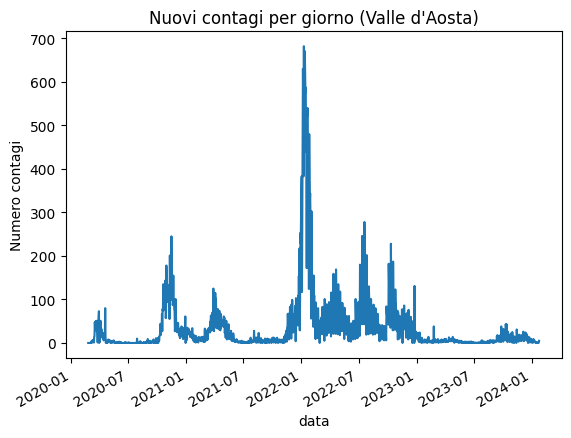

In [50]:
# Grafica il numero di contagi per giorno in Val d'Aosta
data_aosta_daily["nuovi_positivi"].plot(
    title="Nuovi contagi per giorno (Valle d'Aosta)",
    ylabel="Numero contagi",
)

<Axes: title={'center': "Nuovi contagi per giorno (Valle d'Aosta, media settimanale)"}, xlabel='data', ylabel='Numero contagi'>

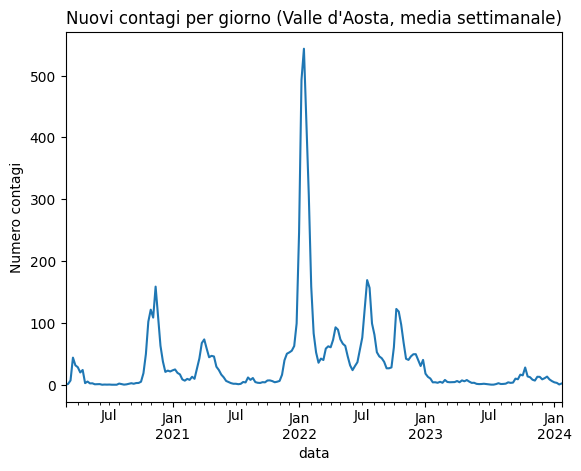

In [55]:
# I dati sono piuttosto rumorosi: conviene graficare la media settimanale
data_aosta_weekly["nuovi_positivi"].mean().plot(
    title="Nuovi contagi per giorno (Valle d'Aosta, media settimanale)",
    ylabel="Numero contagi",
)

<Axes: title={'center': "Nuovi contagi per giorno (Valle d'Aosta, media mensile)"}, xlabel='data', ylabel='Numero contagi'>

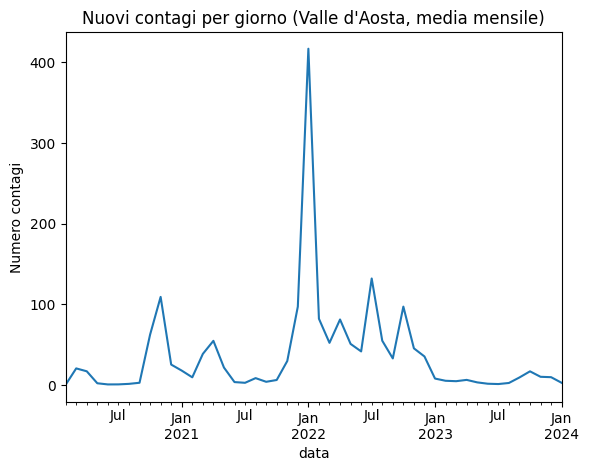

In [56]:
# La media mensile invece è troppo grezza
data_aosta_monthly["nuovi_positivi"].mean().plot(
    title="Nuovi contagi per giorno (Valle d'Aosta, media mensile)",
    ylabel="Numero contagi",
)

# Parte 2

In [57]:
import numpy as np

In [58]:
def logistic(t: float, t_0: float, k: float, N: int):
    """Calcola la funzione logisitica nel punto `t`"""
    return N / (1 + np.exp(-k*(t - t_0)))